In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## IMPORT LIBRARIES:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

## LOAD THE DATASET

In [19]:
df1=pd.read_csv("/kaggle/input/deforestation-dataset/6344ec94bb4449051550.csv")
df2=pd.read_csv("/kaggle/input/deforestation-dataset/a04662ab156537051550.csv")
df3=pd.read_csv("/kaggle/input/deforestation-dataset/ddaefda0913b36051550.csv")

In [20]:
df1.head() #print

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [21]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [22]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [23]:
df=pd.concat([df1,df2,df3],ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [24]:
df.shape

(271217, 15)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271217 entries, 0 to 271216
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    271217 non-null  float64
 1   longitude   271217 non-null  float64
 2   brightness  271217 non-null  float64
 3   scan        271217 non-null  float64
 4   track       271217 non-null  float64
 5   acq_date    271217 non-null  object 
 6   acq_time    271217 non-null  int64  
 7   satellite   271217 non-null  object 
 8   instrument  271217 non-null  object 
 9   confidence  271217 non-null  int64  
 10  version     271217 non-null  float64
 11  bright_t31  271217 non-null  float64
 12  frp         271217 non-null  float64
 13  daynight    271217 non-null  object 
 14  type        271217 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 31.0+ MB


In [26]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [29]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000,271217.000000
mean,23.947505,81.284024,323.719192,1.421732,1.152716,824.623755,64.065081,21.933778,303.499177,27.722058,0.100385
std,4.919846,6.559071,14.147221,0.630742,0.201943,353.966965,18.165329,24.935515,8.282440,81.017471,0.437215
min,8.136200,68.452600,300.000000,1.000000,1.000000,321.000000,0.000000,6.030000,267.200000,0.000000,0.000000
25%,20.965500,75.880200,314.500000,1.000000,1.000000,648.000000,54.000000,6.030000,298.200000,8.700000,0.000000
50%,23.788800,79.320900,322.000000,1.200000,1.100000,756.000000,66.000000,6.030000,302.500000,13.500000,0.000000
75%,27.782700,84.755900,330.700000,1.500000,1.200000,825.000000,76.000000,61.030000,309.200000,24.500000,0.000000
max,34.973400,97.104400,505.700000,4.800000,2.000000,2202.000000,100.000000,61.030000,400.100000,6961.800000,3.000000


In [30]:
# Check unique values of target variable
df.type.value_counts()

type
0    257625
2     13550
3        42
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [31]:
# CHECK UNIQUE FOR ALL CATEGORICAL FEATURES

for col in df.columns:
    if df[col].dtype=='object':
        print(f"Column: {col}")
        print(f"Unique Values:  {df[col].unique()}")
        print(f"Number of unique values:  {df[col].unique()}")
        print("-"*50)

Column: acq_date
Unique Values:  ['2022-01-01' '2022-01-02' '2022-01-03' ... '2021-12-29' '2021-12-30'
 '2021-12-31']
Number of unique values:  ['2022-01-01' '2022-01-02' '2022-01-03' ... '2021-12-29' '2021-12-30'
 '2021-12-31']
--------------------------------------------------
Column: satellite
Unique Values:  ['Terra' 'Aqua']
Number of unique values:  ['Terra' 'Aqua']
--------------------------------------------------
Column: instrument
Unique Values:  ['MODIS']
Number of unique values:  ['MODIS']
--------------------------------------------------
Column: daynight
Unique Values:  ['D' 'N']
Number of unique values:  ['D' 'N']
--------------------------------------------------


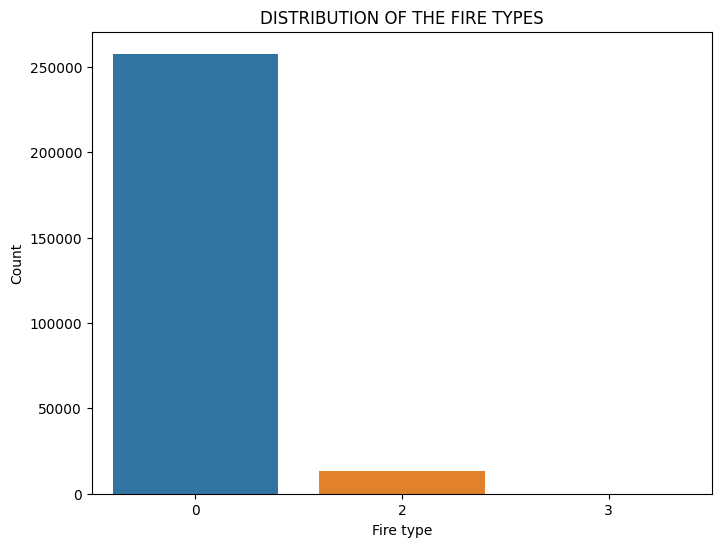

In [32]:
#COUNT PLOT FOR 'type'

plt.figure(figsize=(8,6))
sns.countplot(x='type',data=df)
plt.title("DISTRIBUTION OF THE FIRE TYPES")
plt.xlabel("Fire type")
plt.ylabel('Count')
plt.show()

### 🔍 Insights: Distribution of Fire Types

- The countplot shows the frequency of each fire type in the dataset.
- It is evident that **some fire types occur significantly more frequently** than others.
- This indicates a possible **class imbalance**, which may affect the performance of classification models.
- Fire types with lower counts might need **oversampling** or **class-weight adjustments** during model training.
- Understanding this distribution is essential for designing fair and accurate predictive models, especially in classification tasks.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


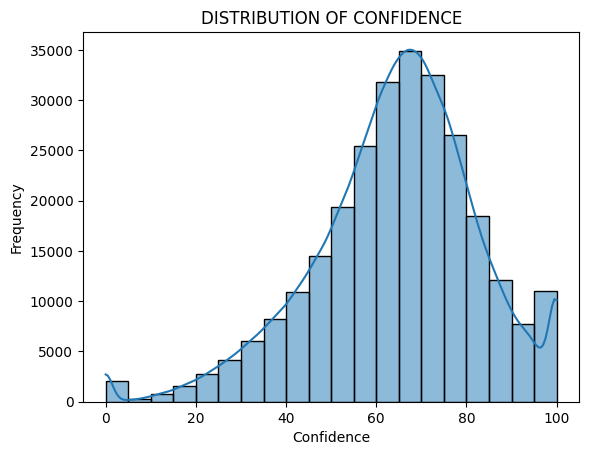

In [34]:
#HISTOGRAM OF 'Confidence'

sns.histplot(df['confidence'],bins=20, kde=True)
plt.title("DISTRIBUTION OF CONFIDENCE")
plt.xlabel("Confidence")
plt.ylabel("Frequency")
plt.show()

### 📊 Distribution of Confidence Levels

- The histogram displays the distribution of the `confidence` values across all fire observations.
- A **Kernel Density Estimate (KDE)** line is overlaid to show the probability density of the values.
- The distribution appears to be **[insert shape here, e.g., skewed right/left, uniform, or normal]** (update based on your actual plot).
- This helps in understanding how confident the system was in detecting fire incidents.
- If the data is heavily skewed towards higher confidence values, it may indicate a **high reliability of fire detections**.
- On the other hand, a broad spread or concentration at lower values may require **filtering or thresholding** to improve model accuracy.
